# Loading Dataset

In [1]:
import pandas as pd

data = pd.read_csv("titanic.csv")

In [2]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Dropping Unnecessary Column

In [3]:
data = data.drop(columns=['Name','Ticket'])

# Data Visualization

The Data Shape

In [4]:
data.shape

(891, 10)

Before visualizing, all non-numeric data will be converted to numeric data

In [5]:
from sklearn.preprocessing import LabelEncoder

Encoder = LabelEncoder()
data['Sex'] = Encoder.fit_transform(data['Sex'])
data['Embarked'] = Encoder.fit_transform(data['Embarked'])
data['Cabin'] = Encoder.fit_transform(data['Cabin'])

Plotting Correlation from Data

<Axes: >

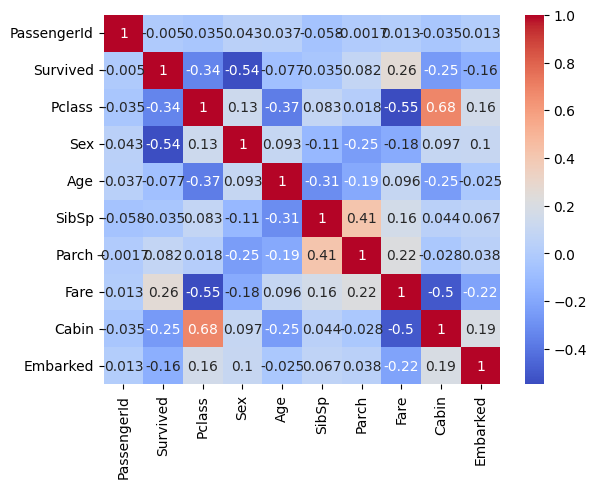

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='Age', ylabel='Count'>

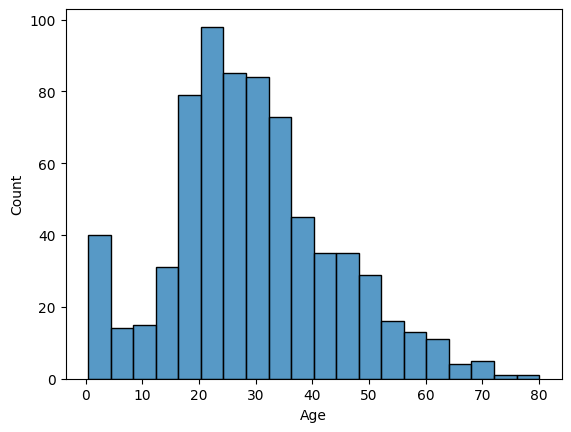

In [7]:
sns.histplot(data=data['Age'])

<Axes: title={'center': 'Boxplot of Age'}, ylabel='Age'>

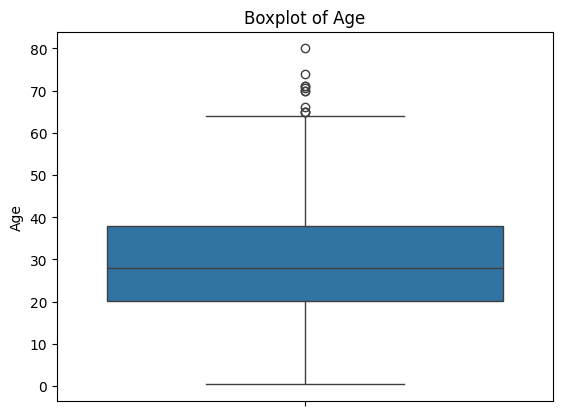

In [8]:
plt.title('Boxplot of Age')
sns.boxplot(data=data['Age'])


<Axes: title={'center': 'Histogram of Pclass vs Survived'}, xlabel='Pclass', ylabel='Survived'>

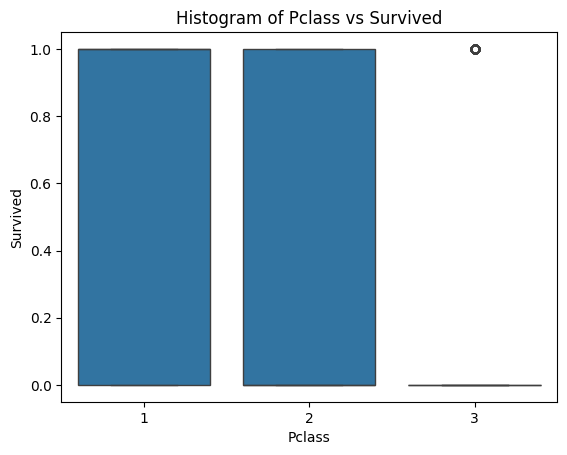

In [9]:
plt.title('Histogram of Pclass vs Survived')
sns.boxplot(data=data,x='Pclass',y='Survived')

<Axes: title={'center': 'Boxplot of Sex vs Survived'}, xlabel='Sex', ylabel='Survived'>

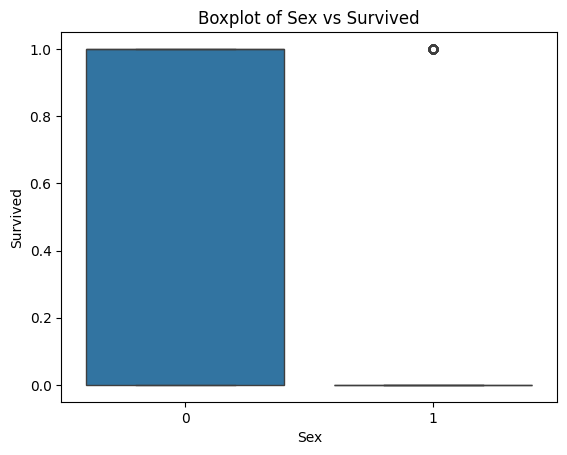

In [10]:
plt.title('Boxplot of Sex vs Survived')
sns.boxplot(data=data,x='Sex',y='Survived')

<Axes: ylabel='Fare'>

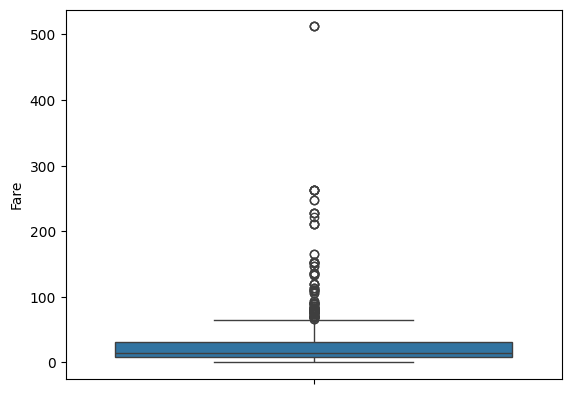

In [11]:
sns.boxplot(data=data['Fare'])

<Axes: xlabel='Embarked', ylabel='SibSp'>

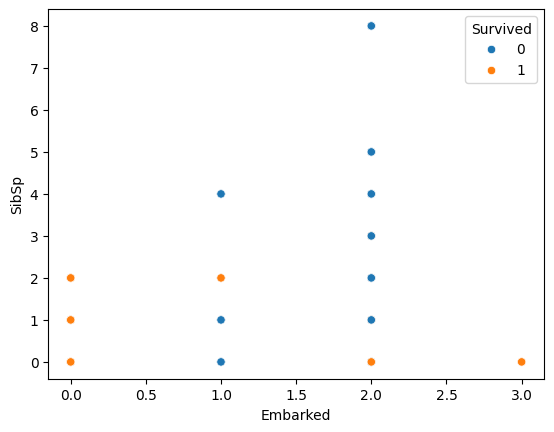

In [12]:
sns.scatterplot(data=data,x='Embarked',y='SibSp',hue='Survived')

<Axes: xlabel='Parch', ylabel='SibSp'>

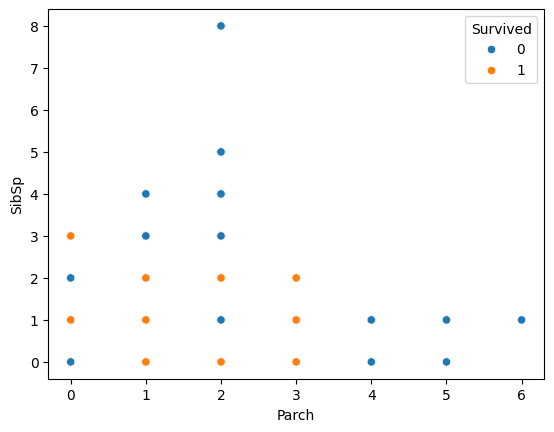

In [13]:
sns.scatterplot(data=data,x='Parch',y='SibSp',hue='Survived')

# Preprocessing

Check for Missing Value

In [14]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [15]:
median = data['Age'].median()
data['Age'] = data['Age'].fillna(median)

In [16]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Feature Selection

In [17]:
from scipy.stats import pearsonr
copydata = data.copy()
copydata = copydata.drop(columns='Survived')
features = list(copydata.columns)

In [18]:
features

['PassengerId',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Cabin',
 'Embarked']

In [19]:
p_values = []
correlation_list = []

for feature in features:
    correlation_coefficient,p_value = pearsonr(copydata[feature],data['Survived'])
    p_values.append(p_value)
    correlation_list.append(correlation_coefficient)

filtered_columns = []
for feature, p_value, correlation_coefficient in zip(features,p_values,correlation_list):
    if p_value < 0.05 and abs(correlation_coefficient) > 0.1:
        filtered_columns.append(feature)

In [20]:
filtered_columns

['Pclass', 'Sex', 'Fare', 'Cabin', 'Embarked']

In [21]:
filtered_columns

['Pclass', 'Sex', 'Fare', 'Cabin', 'Embarked']

In [22]:
new_data = data.drop(columns=['PassengerId','SibSp','Parch'])

In [23]:
new_data.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked
0,0,3,1,22.0,7.2500,147,2
1,1,1,0,38.0,71.2833,81,0
2,1,3,0,26.0,7.9250,147,2
3,1,1,0,35.0,53.1000,55,2
4,0,3,1,35.0,8.0500,147,2


Removing Outlier from Fare

Before Removing Outlier

In [24]:
new_data.shape

(891, 7)

In [26]:
import numpy as np
Q1 = new_data['Fare'].quantile(0.25)
Q3 = new_data['Fare'].quantile(0.75)
IQR = Q3 - Q1
Lower = Q1 - 1.5*IQR
Upper = Q3 + 1.5*IQR
lower_array = np.where(new_data['Fare']<=Lower)[0]
upper_array = np.where(new_data['Fare']>=Upper)[0]

new_data.drop(index=lower_array,inplace=True)
new_data.drop(index=upper_array,inplace=True)
new_data = new_data.reset_index(drop=True)

In [27]:
new_data.shape

(750, 7)

In [28]:
Q1 = new_data['Age'].quantile(0.25)
Q3 = new_data['Age'].quantile(0.75)
IQR = Q3 - Q1
Lower = Q1 - 1.5*IQR
Upper = Q3 + 1.5*IQR
lower_array = np.where(new_data['Age']<=Lower)[0]
upper_array = np.where(new_data['Age']>=Upper)[0]

new_data.drop(index=lower_array,inplace=True)
new_data.drop(index=upper_array,inplace=True)
new_data = new_data.reset_index(drop=True)

After Removing Outlier

In [29]:
new_data.shape

(673, 7)

In [30]:
new_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [31]:
len(new_data)

673

In [32]:
new_data.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked
0,0,3,1,22.0,7.2500,147,2
1,1,3,0,26.0,7.9250,147,2
2,1,1,0,35.0,53.1000,55,2
3,0,3,1,35.0,8.0500,147,2
4,0,3,1,28.0,8.4583,147,1


In [33]:
new_data.tail()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked
668,0,2,1,27.0,13.00,147,2
669,1,1,0,19.0,30.00,30,2
670,0,3,0,28.0,23.45,147,2
671,1,1,1,26.0,30.00,60,0
672,0,3,1,32.0,7.75,147,1


In [34]:
new_data.tail()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked
668,0,2,1,27.0,13.00,147,2
669,1,1,0,19.0,30.00,30,2
670,0,3,0,28.0,23.45,147,2
671,1,1,1,26.0,30.00,60,0
672,0,3,1,32.0,7.75,147,1


Min Max Normalizer

In [35]:
from sklearn.preprocessing import MinMaxScaler
copy_df = new_data.copy()

Scaler = MinMaxScaler()
Scaled_data = Scaler.fit_transform(copy_df)

df = pd.DataFrame(Scaled_data,columns=['Survived','Pclass','Sex','Fare','Cabin','Embarked','Age'])
new_data['Fare'] = df['Fare']

In [36]:
new_data['Cabin'] = df['Cabin']

In [37]:
new_data.tail()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked
668,0,2,1,27.0,0.478261,0.244821,2
669,1,1,0,19.0,0.304348,0.564972,2
670,0,3,0,28.0,0.500000,0.441620,2
671,1,1,1,26.0,0.456522,0.564972,0
672,0,3,1,32.0,0.586957,0.145951,1


In [38]:
new_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Cabin       0
Embarked    0
dtype: int64

Splitting Dataset

In [39]:
from sklearn.model_selection import train_test_split

x = new_data.drop(columns=['Survived'])
y = new_data['Survived']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

# Modeling

Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)

LR_predict = LR.predict(x_test)



Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(x_train,y_train)

NB_Predict = NB.predict(x_test)

# Evaluation

In [42]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

print("Logistic Regression")
print(classification_report(y_test,LR_predict))

Logistic Regression
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       139
           1       0.72      0.60      0.66        63

    accuracy                           0.80       202
   macro avg       0.77      0.75      0.76       202
weighted avg       0.80      0.80      0.80       202



In [43]:
print("Naive Bayes")
print(classification_report(y_test,NB_Predict))

Naive Bayes
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       139
           1       0.66      0.73      0.69        63

    accuracy                           0.80       202
   macro avg       0.76      0.78      0.77       202
weighted avg       0.80      0.80      0.80       202

